## <center><strong><span style= 'color: #51fcc6'>Notebook </span>Describtion

In this notebook we will vizualize the issues in the data to determine what are the issues and how<br>
will they be fixed using SQL querries <sub>*(In the queries folder)</sub> also we will dive into the text data to find<br>
the issues.

#### **Important note:**
1. The feature extraction will be done using SQL with some data cleaning more about that in the queries<br>
   folder.
<br><br>
2. Most of the data manipulations in this notebook will be done using SQL commands inside the python <br>code.

#### **Table of contents:**
- Basic data graping & exploring
- Essential data cleaning
- Visualizing the data issues
- Cleaning the jobs data
- Cleaning the freelancing data
- Saving the data

## <center><strong>Importing the <span style= 'color: #48e0dc'>Packeges</span>

In [1]:
import os
import warnings
import matplotlib
import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt

from google.cloud         import bigquery
from wordcloud            import WordCloud
from IPython.display      import set_matplotlib_formats
from collections          import Counter

In [2]:
%matplotlib inline
# set_matplotlib_formats('pdf', 'svg')
plt.rcParams['font.family'] = 'Candara'

warnings.filterwarnings('ignore')

credentials_path :str = '../credentials.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credentials_path

FONT             :int  = 17
COLORS           :list = ['#51fcc6', '#48e0dc', '#5cd3f7', '#4895e0', '#517afc']
NUMERICS         :list = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',
                          'uint16', 'uint32', 'uint64']

## <center><strong>Data reading & basic <span style= 'color: #5cd3f7'> Exploring

In [3]:
project_id :str = 'data-jobs-analysis-db'
dataset_id :str = 'data_jobs_analysis_db'

client   = bigquery.Client(project= project_id)

linkedin_jobs    = client.query(f'SELECT * FROM {dataset_id}.linkedin_jobs;').to_dataframe()
upwork_profiles  = client.query(f'SELECT * FROM {dataset_id}.upwork_profiles;').to_dataframe()
guru_profiles    = client.query(f'SELECT * FROM {dataset_id}.guru_profiles;').to_dataframe()

#### **LinkedIn data Exploring**

In [2]:
linkedin_jobs.sample(5)

NameError: name 'linkedin_jobs' is not defined

In [5]:
linkedin_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3521 entries, 0 to 3520
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   jobs_locations      3521 non-null   object
 1   listing_dates       3414 non-null   object
 2   jobs_titles         3521 non-null   object
 3   companies_names     3521 non-null   object
 4   jobs_links          3521 non-null   object
 5   describtion         3455 non-null   object
 6   location_type       403 non-null    object
 7   employment_type     3455 non-null   object
 8   industry            3414 non-null   object
 9   reqierd_credential  3276 non-null   object
 10  country             3521 non-null   object
 11  job_title           3521 non-null   object
 12  total_jobs          3521 non-null   Int64 
dtypes: Int64(1), object(12)
memory usage: 361.2+ KB


from only those two methods we found that there are many proplems in this table just to<br> 
name a few with those methods only:
- Inconsistent DTypes
- Issues in the text data
- Many NAN values
- New useless column

& bunch more we will see after we dive more in the next sections.

#### **Guru data Exploring**

In [6]:
guru_profiles.sample(5)

,describtion,earnings_amount,feedback,name,job_title,addresse,hour_rate,minimum_pay,skills,data_job_title
760,"Expert in: R, SPSS and Stata and excellent in ...",None,None,The Data Scientist,Statistician and Data Analyst.,"Mombasa, Coast, Kenya",$15/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Analyst', 'Analytics', 'Data Analysis',...",Data Analyst
229,Have experience in performing data analysis. I...,None,None,Sireesha Mallampally,Research/data analyst,"Lincoln Park, New Jersey, United States",$5/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Analyst', 'Analysis', 'Data Analysis', ...",Data Analyst
1038,"I am fully expert in Data Entry, Data Mining, ...","21,998",100%,Waseem Abbas 27,Admin Support/Data Entry Expert,"Multan, Punjab, Pakistan",$8/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Data Entry', '10 Key', 'Administrative Assis...",Data entry
1794,I have worked as an Analyst in a analytical CR...,None,None,Tomas Ukkonen,Analytics and Machine Learning,"Mikkeli, Eastern Finland, Finland",$50/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Machine Learning', 'Analytics', 'C++', 'Data...",Machine Learning
1720,"I am good in AI and Machine Learning, I know h...",None,None,kssaileshjobs1,"Machine Learning, AI & Data Set creation","Trichur, Kerala, India",$12/hr\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,Starting at\r\n\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\...,"['Machine Learning', 'Analytics', 'Artificial ...",Machine Learning


In [7]:
guru_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   describtion      1900 non-null   object
 1   earnings_amount  215 non-null    object
 2   feedback         99 non-null     object
 3   name             1900 non-null   object
 4   job_title        1900 non-null   object
 5   addresse         1900 non-null   object
 6   hour_rate        1900 non-null   object
 7   minimum_pay      1900 non-null   object
 8   skills           1900 non-null   object
 9   data_job_title   1900 non-null   object
dtypes: object(10)
memory usage: 148.6+ KB


Oh we can find that this table is even more worse than the previous one. 

#### **UpWork data Exploring**

In [8]:
upwork_profiles.sample(5)

,describtion,earnings_amount,feedback,name,job_title,country,hour_rate,consultations_offers,skills,data_job_title
779,I'm a scraper expert specialized in data extra...,$60K+,98.0,ahmad S.,"Data Entry Pro, Expert Web Spider, Scraper and...",Indonesia,$15.00,Doesn't offer consultations,"['Data Mining', 'Microsoft Excel', 'Document C...",Data entry
295,🏆 Top Rated Plus Freelancer (Among Top 3% on U...,$100K+,100.0,Zeeshan A.,Skip Tracing / CRE Database Building / Lead Ge...,Pakistan,$25.00,Doesn't offer consultations,"['Data Mining', 'List Building', 'Skip Tracing...",Data entry
444,I am a mathematician that wants to help busine...,$9k+,100.0,Giorgi R.,Mathematician: Analysis Geometry Optimization ...,Georgia,$50.00,Offers consultations,"['Offers consultations', 'Machine Learning', '...",Machine Learning
930,"I am Lyca,I am a highly dedicated and professi...",$10K+,99.0,Lyca Amor C.,Superb Data Entry and Admin Support,Philippines,$6.00,Doesn't offer consultations,"['Data Mining', 'Microsoft Excel', 'Administra...",Data entry
193,"Top Rated Data Scientist, and Problem Solver w...",$4K+,96.0,Usama H.,Top Rated Data Scientist,Pakistan,$40.00,Offers consultations,"['Offers consultations', 'Data Mining', 'Data ...",Data scientist


In [9]:
upwork_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   describtion           950 non-null    object 
 1   earnings_amount       791 non-null    object 
 2   feedback              870 non-null    float64
 3   name                  950 non-null    object 
 4   job_title             950 non-null    object 
 5   country               950 non-null    object 
 6   hour_rate             950 non-null    object 
 7   consultations_offers  950 non-null    object 
 8   skills                950 non-null    object 
 9   data_job_title        950 non-null    object 
dtypes: float64(1), object(9)
memory usage: 74.3+ KB


Wow until now this is the most clean table but we will stillwe didnt do the full exploring yet.

## <center><strong>Data issues <span style= 'color: #4895e0'> Visualization

In [10]:
linkedin_jobs   = linkedin_jobs  .loc[:, ~linkedin_jobs.columns.str.contains('^Unnamed')]
guru_profiles   = guru_profiles  .loc[:, ~guru_profiles.columns.str.contains('^Unnamed')]
upwork_profiles = upwork_profiles.loc[:, ~upwork_profiles.columns.str.contains('^Unnamed')]

def add_bar_labels(x,y, ax, scaler= 0):
    for i in range(len(x)):
        ax.text(i, y[i] + scaler , '{:,}'.format(y[i]), ha = 'center')

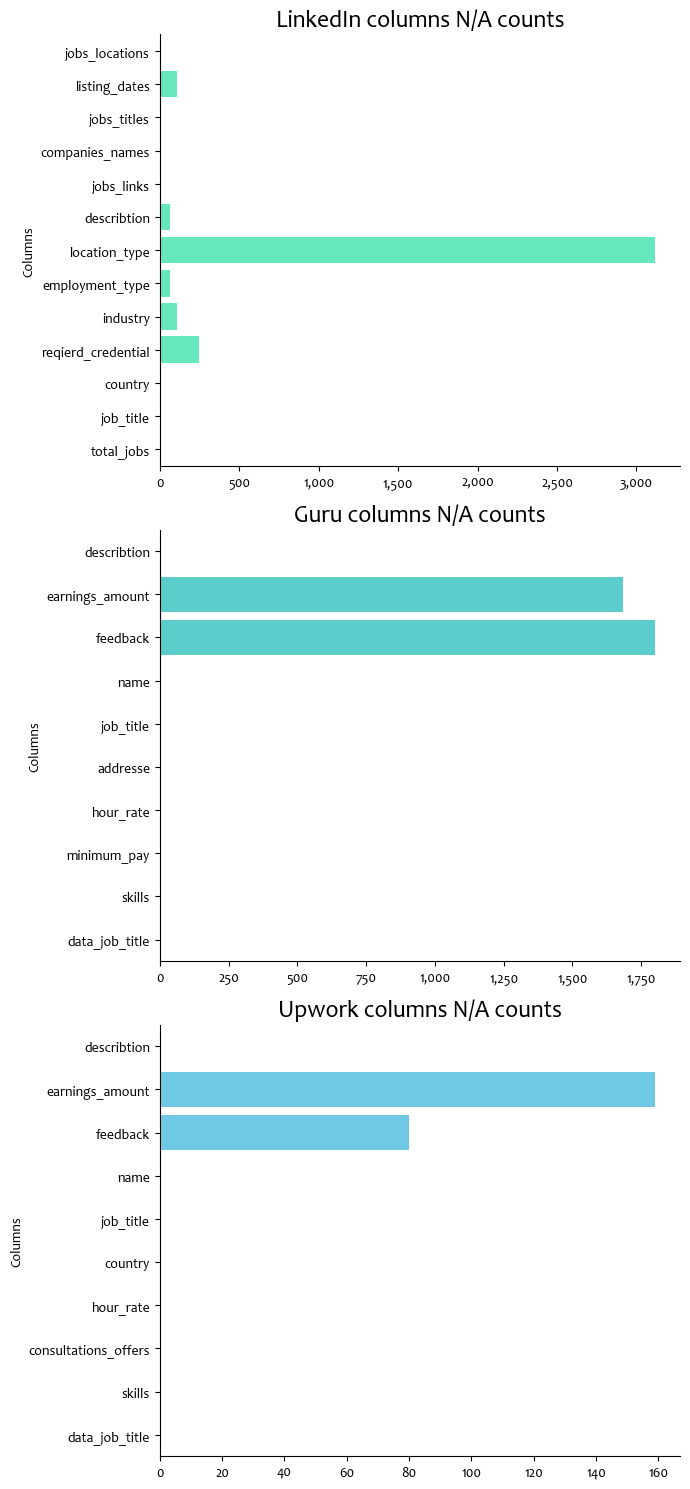

In [25]:
fig, axes = plt.subplots(3, 1)

linkedin_null_count = []
guru_null_count = []
upwork_null_count = []

for col in linkedin_jobs.columns:
    linkedin_null_count.append(linkedin_jobs[col].isnull().sum())

for col in guru_profiles.columns:
    guru_null_count.append(guru_profiles[col].isnull().sum())

for col in upwork_profiles.columns:
    upwork_null_count.append(upwork_profiles[col].isnull().sum())


sns.barplot(x= linkedin_null_count, y= linkedin_jobs.columns,
            color=COLORS[0], ax= axes[0])

sns.barplot(x= guru_null_count, y= guru_profiles.columns,
            color=COLORS[1], ax= axes[1])

sns.barplot(x= upwork_null_count, y= upwork_profiles.columns,
            color=COLORS[2], ax= axes[2])


axes[0].set_title('LinkedIn columns N/A counts', fontsize=FONT)
axes[1].set_title('Guru columns N/A counts',     fontsize=FONT)
axes[2].set_title('Upwork columns N/A counts',   fontsize=FONT)

# Customize the plots
for ax in fig.axes:
    plt.sca(ax)
    plt.ylabel('Columns')
    sns.despine()
    
    ax.get_xaxis().set_major_formatter(
        plt.FuncFormatter(lambda x, p: format(int(x), ',')))

fig.set_size_inches(7, 15)
plt.tight_layout()
plt.show()

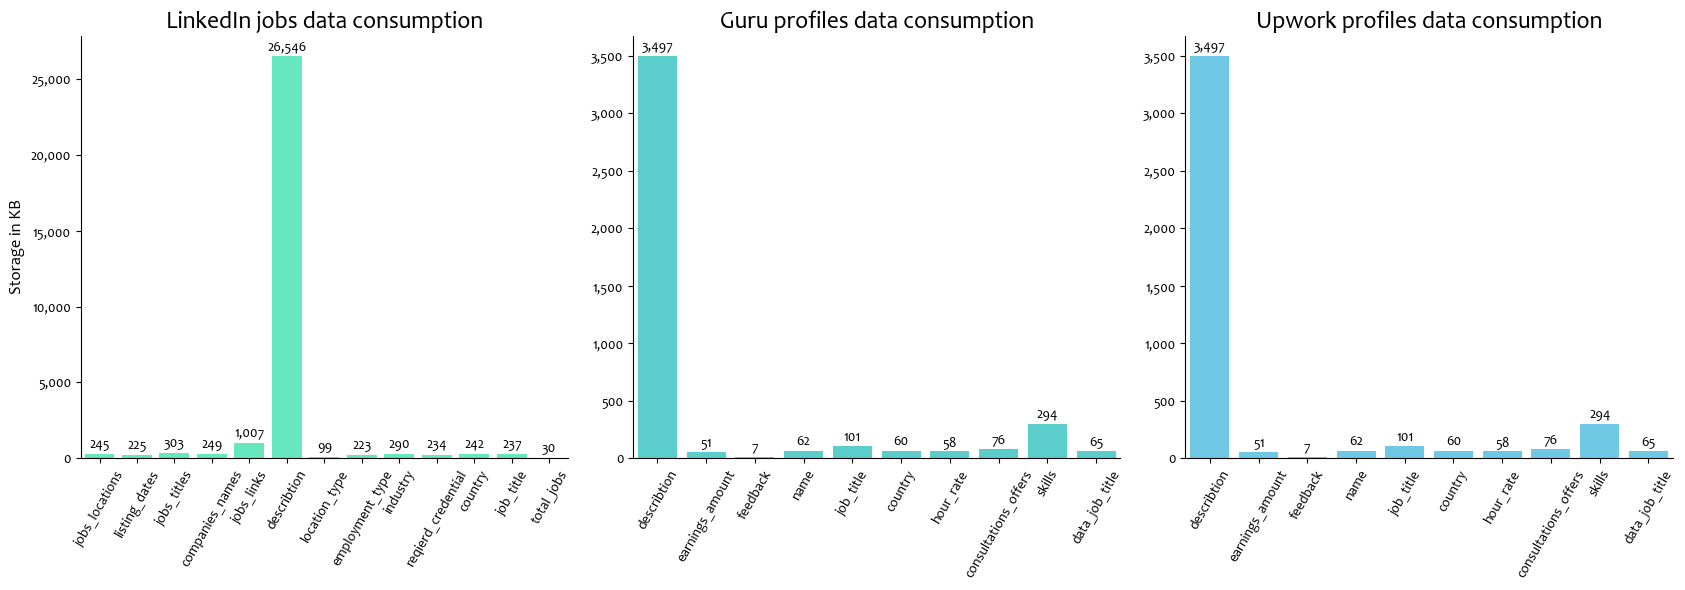

In [23]:
fig, axes = plt.subplots(1, 3)


linkedin_consumation  = linkedin_jobs.memory_usage(index=False, deep=True).values // 1024
linkedin_cols         = linkedin_jobs.memory_usage(index=False, deep=True).index

guru_consumation      = upwork_profiles.memory_usage(index=False, deep=True).values // 1024
guru_cols             = upwork_profiles.memory_usage(index=False, deep=True).index

upwork_consumation    = upwork_profiles.memory_usage(index=False, deep=True).values // 1024
upwork_cols           = upwork_profiles.memory_usage(index=False, deep=True).index


sns.barplot(x= linkedin_cols, y=linkedin_consumation, color=COLORS[0],  ax=axes[0])
add_bar_labels(linkedin_cols, linkedin_consumation, axes[0], scaler= 400)

sns.barplot(x= guru_cols,     y=guru_consumation,     color=COLORS[1],  ax=axes[1])
add_bar_labels(guru_cols,     guru_consumation,     axes[1], scaler= 50)

sns.barplot(x= upwork_cols,   y=upwork_consumation,   color=COLORS[2],  ax=axes[2])
add_bar_labels(upwork_cols,   upwork_consumation,   axes[2], scaler= 50)


axes[0].set_title('LinkedIn jobs data consumption',   fontsize=FONT)
axes[1].set_title('Guru profiles data consumption',   fontsize=FONT)
axes[2].set_title('Upwork profiles data consumption', fontsize=FONT)

axes[0].set_ylabel('Storage in KB', fontsize=12)


for ax in axes:
    ax.spines['right'] .set_visible(False)
    ax.spines['top']   .set_visible(False)
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

fig.set_size_inches(17, 6)
plt.tight_layout()
plt.show()

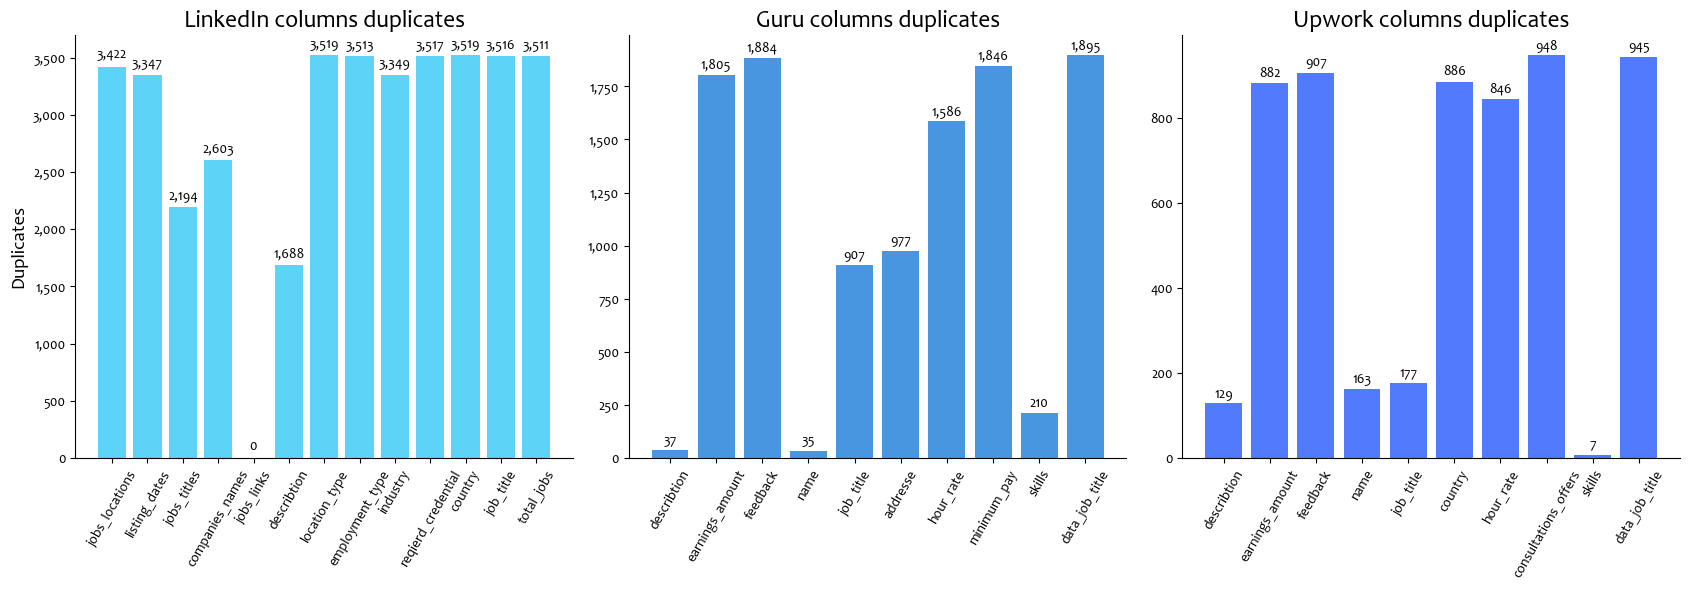

In [18]:
fig, axes = plt.subplots(1, 3)

linkedin_duplicates = linkedin_jobs   .apply(lambda x: x.duplicated().sum())
guru_duplicates     = guru_profiles   .apply(lambda x: x.duplicated().sum())
upwork_duplicates   = upwork_profiles .apply(lambda x: x.duplicated().sum())

axes[0].bar(x= linkedin_duplicates.index,  height= linkedin_duplicates.values,  color= COLORS[2])
axes[1].bar(x= guru_duplicates.index,      height= guru_duplicates.values,      color= COLORS[3])
axes[2].bar(x= upwork_duplicates.index,    height= upwork_duplicates.values,    color= COLORS[4])


add_bar_labels(linkedin_duplicates.index,  linkedin_duplicates.values, axes[0], scaler= 70)
add_bar_labels(guru_duplicates.index,      guru_duplicates.values,     axes[1], scaler= 30)
add_bar_labels(upwork_duplicates.index,    upwork_duplicates.values,   axes[2], scaler= 15)

axes[0].set_title('LinkedIn columns duplicates'  , fontsize= FONT)
axes[1].set_title('Guru columns duplicates'  ,     fontsize= FONT)
axes[2].set_title('Upwork columns duplicates',     fontsize= FONT)

axes[0].set_ylabel('Duplicates', fontsize= FONT * 4/5)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

    ax.spines[['right', 'top']].set_visible(False)
    ax.get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
fig.set_size_inches(17, 6)
plt.tight_layout()
plt.show()

In [20]:
def get_top_non_english_chars(char_list, threshold= 20):
    # Count the occurrences of each character
    
    char_counts = Counter(char_list)
    non_english_chars = {char: count for char, count in char_counts.items() if ord(char) > 127}

    sorted_chars = sorted(non_english_chars.items(), key=lambda item: item[1], reverse=True)
    top_chars = dict(sorted_chars[:threshold])

    return top_chars
                         

def custom_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    # Use modulo operation to loop through the hex_colors list
    return COLORS[hash(word) % len(COLORS)]

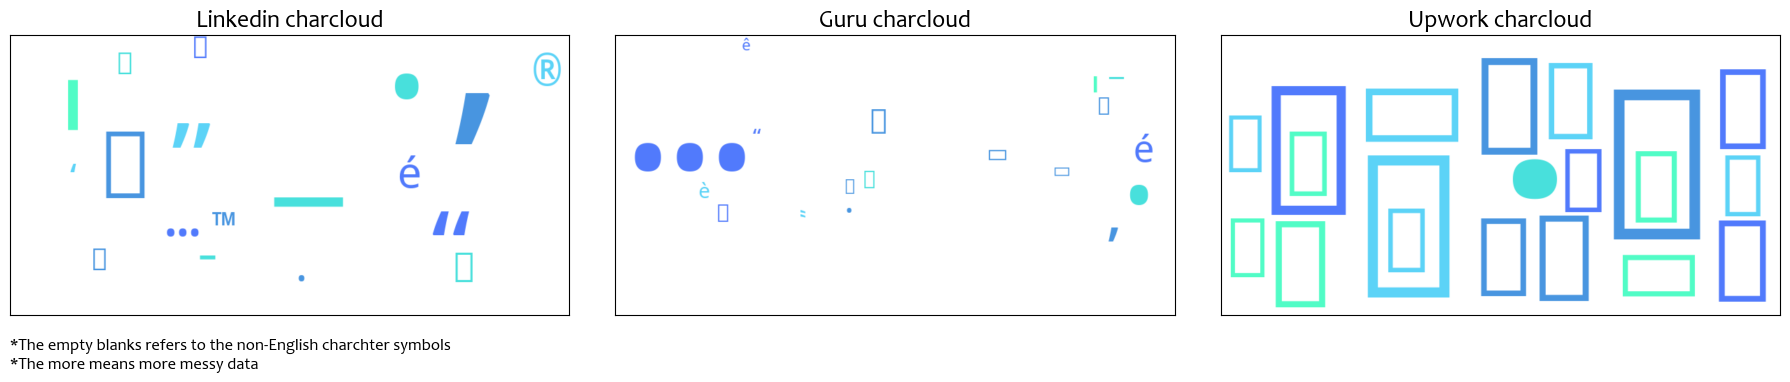

In [29]:
fig, axes = plt.subplots(1, 3)

linkedin_char_freq =  get_top_non_english_chars(list(linkedin_jobs   ['describtion'].str.cat()))
guru_char_freq     =  get_top_non_english_chars(list(guru_profiles   ['describtion'].str.cat()))
upwork_char_freq   =  get_top_non_english_chars(list(upwork_profiles ['describtion'].str.cat()))


linkedin_wordcloud = WordCloud(width=800, height=400, background_color= 'white')
guru_wordcloud     = WordCloud(width=800, height=400, background_color= 'white')
upwork_wordcloud   = WordCloud(width=800, height=400, background_color= 'white')

linkedin_wordcloud .generate_from_frequencies(linkedin_char_freq, max_font_size= 300)
guru_wordcloud     .generate_from_frequencies(guru_char_freq    , max_font_size= 300)
upwork_wordcloud   .generate_from_frequencies(upwork_char_freq  , max_font_size= 300)


axes[0].imshow(linkedin_wordcloud.recolor(
    color_func=custom_color_func, random_state=3), interpolation= 'bilinear')

axes[1].imshow(guru_wordcloud.recolor(
    color_func=custom_color_func, random_state=3), interpolation= 'bilinear')

axes[2].imshow(upwork_wordcloud.recolor(
    color_func=custom_color_func, random_state=3), interpolation= 'bilinear')


axes[0].set_title('Linkedin charcloud', fontsize= FONT)
axes[1].set_title('Guru charcloud',     fontsize= FONT)
axes[2].set_title('Upwork charcloud',   fontsize= FONT)

for ax in fig.axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
axes[0].text(0, 450, '*The empty blanks refers to the non-English charchter symbols', ha='left', fontsize=12)
axes[0].text(0, 476, '*The more means more messy data', ha='left', fontsize=12)
    
fig.set_size_inches(17, 6)
plt.tight_layout()
plt.show()

## <center><strong><span style= 'color: #517afc'>Conclusions</span> & next steps

#### Now we've seen most of the data non-statical problems which are: 
- The hidden data inside the descrebtions.
- The NANs that are every where in the data.
- The wierd ASCII chars in the text data & the escape sequences.
- The duplicated companies postings on linkedin.
- The storage that our data consume becuase the inconsistent `dtypes`

All of that will be fixed god wells by the queries and will be saved on my BigQuerry DB<sub>